In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output
import shutil

In [ ]:
image_folder = '../images_resized/'

In [ ]:
images = os.listdir(image_folder)
images.sort()
images

In [ ]:
def show_next_image_row(img_idx):
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    img1 = mpimg.imread(image_folder + images[img_idx])
    axes[0].imshow(img1)
    axes[0].set_title('Image 1')
    
    img2 = mpimg.imread(image_folder + images[img_idx+1])
    axes[1].imshow(img2)
    axes[1].set_title('Image 2')

    if images[img_idx].split('_')[0] != images[img_idx+2].split('_')[0]:
        plt.show()
        return 2
    
    img3 = mpimg.imread(image_folder + images[img_idx+2])
    axes[2].imshow(img3)
    axes[2].set_title('Image 3')
    
    plt.show()
    return 3
    

In [ ]:
idx = 669
while True:
    num_images = show_next_image_row(idx)
    ans = input("º / 1 / 2 models")
    if ans == 'º' or ans == '': ans = 0
    ans = int(ans)
    
    clear_output()

    models_folder = ['0_models/', '1_model/', '2_models/']

    for image in images[idx:idx+num_images]:
        shutil.copy(image_folder + image, image_folder + models_folder[ans] + image)
    
    idx += num_images
    

Carpeta 0

In [ ]:
images_0 = sorted(os.listdir(image_folder + models_folder[0]))

count = 1
prev_img = images_0[0]

for image in images_0[1:]:
    if image.split('_')[0] != prev_img.split('_')[0]:
        if count == 1:
            os.remove(image_folder + models_folder[0] + prev_img)
        count = 1
    else:
        count += 1

    prev_img = image

Carpeta 1

In [ ]:
images_1 = sorted(os.listdir(image_folder + models_folder[1]))

count = 1
prev_img = images_1[0]

for image in images_1[1:]:
    if image.split('_')[0] != prev_img.split('_')[0]:
        if count == 1:
            os.remove(image_folder + models_folder[1] + prev_img)
        count = 1
    else:
        count += 1

    prev_img = image

Carpeta 2

In [ ]:
folder_path = image_folder + models_folder[2]
files = sorted(os.listdir(folder_path))

count = 1
prev_img = files[0]
re_prev_img = ''

for file in files[1:]:

    if file.split('_')[0] != prev_img.split('_')[0]:
        if count == 2:
            os.remove(os.path.join(folder_path, prev_img))
            os.remove(os.path.join(folder_path, re_prev_img))

        count = 1
    else:
        count += 1

    re_prev_img = prev_img
    prev_img = file

In [ ]:
images_0 = sorted(os.listdir(image_folder + models_folder[0]))
images_1 = sorted(os.listdir(image_folder + models_folder[1]))
images_2 = sorted(os.listdir(image_folder + models_folder[2]))

In [ ]:
new_images_folder = '../images_resized/'

In [ ]:
def get_cropped_images(images_0, images_1, images_2):
    for image in images_0:
        shutil.copy(new_images_folder + image, '../images_0/'+ image)
    
    for image in images_1:
        shutil.copy(new_images_folder + image, '../images_1/'+ image)

    for image in images_2:
        shutil.copy(new_images_folder + image, '../images_2/'+ image)

In [ ]:
get_cropped_images(images_0, images_1, images_2)

Obtain similarity between embedings

In [ ]:


# Example embeddings
embedding1 = [0.2, 0.4, 0.6]
embedding2 = [0.1, 0.5, 0.3]

# Compute cosine similarity
similarity = cosine_similarity([embedding1], [embedding2])[0][0]
print(similarity)

Load embeddings

In [54]:
!pip install h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 3.3 MB/s eta 0:00:0000:0100:010m


In [59]:
import h5py

h5f = h5py.File('../images_0.h5', 'r')
train_embeddings = h5f['image_embeddings'][:]

train_embeddings

array([[ 0.15454102, -0.22253418,  0.01873779, ...,  1.        ,
         0.        ,  0.        ],
       [-0.16235352, -0.53515625,  0.35766602, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09533691,  0.02001953, -0.11779785, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.10083008, -0.00698471, -0.02198792, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38427734, -0.01298523, -0.01400757, ...,  1.        ,
         0.        ,  0.        ],
       [-0.28442383,  0.0047493 , -0.17834473, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [105]:
import numpy as np
from scipy.spatial.distance import cosine
dists = []
subset = [images_0[0]]

for idx, img in enumerate(images_0[1:]):
    if img.split('_')[0] != subset[0].split('_')[0]:
        if len(subset) == 2:
            dists.append(cosine(train_embeddings[idx-1], train_embeddings[idx]))
        else:
            assert len(subset) == 3
            dists.append(np.mean([cosine(train_embeddings[idx-1], train_embeddings[idx]),
                                cosine(train_embeddings[idx-2], train_embeddings[idx]),
                                cosine(train_embeddings[idx-2], train_embeddings[idx-1])]))

        subset = [img]
    
    
    else:
        subset.append(img)



# Compute mean
mean = np.mean(dists)

# Compute variance (corrected)
var = np.var(dists, ddof=1)
std = np.sqrt(var)


print("Mean:", mean)
print("Variance (corrected):", var)
print("standard deviation", np.sqrt(var))

Mean: 0.27158965134551677
Variance (corrected): 0.0035935611571433204
standard deviation 0.0599463189624127


In [120]:
from scipy.stats import t

# compute the 95% confidence interval for a new observation:
quant = t.ppf(0.95, df=len(dists)-1)  # replace 'norm' with 't'

conf_interval = [mean - quant * std, mean + quant * std]
quant

1.6493742764993597

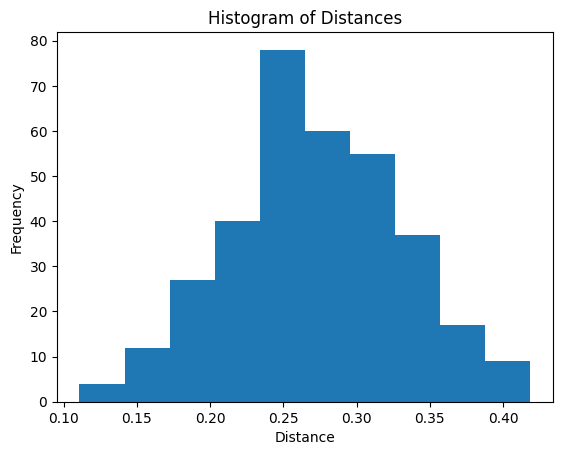

In [118]:
import matplotlib.pyplot as plt

plt.hist(dists, bins=10)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances')
plt.show()

In [119]:
total=len(dists)
removed=0

for idx, img in enumerate(images_0[1:]):
    if img.split('_')[0] != subset[0].split('_')[0]:
        if len(subset) == 2:
            dist = cosine(train_embeddings[idx-1], train_embeddings[idx])

        else:
            dist = np.mean([cosine(train_embeddings[idx-1], train_embeddings[idx]),
                                cosine(train_embeddings[idx-2], train_embeddings[idx]),
                                cosine(train_embeddings[idx-2], train_embeddings[idx-1])])

        subset = [img]

        if not (conf_interval[0] < dist < conf_interval[1]):
            removed += 1
            
    
    else:
        subset.append(img)

print(removed / total)

0.10324483775811209


In [130]:
total = 0
removed = 0

for idx, img in enumerate(images_1[1:]):
    if img.split('_')[0] != subset[0].split('_')[0]:
        if len(subset) == 2:
            dist = cosine(train_embeddings[idx-1], train_embeddings[idx])

        else:
            dist = np.mean([cosine(train_embeddings[idx-1], train_embeddings[idx]),
                                cosine(train_embeddings[idx-2], train_embeddings[idx]),
                                cosine(train_embeddings[idx-2], train_embeddings[idx-1])])

        subset = [img]

        if not (conf_interval[0] < dist < conf_interval[1]):
            removed += 1
        total += 1
            
    
    else:
        subset.append(img)

print(removed / total)

0.0
